Code to generate some thesis figures

### Scatterplot of Spearman correlation coefficients between metabolomic and proteomic

In [1]:
#Load libraries 

import pandas as pd
#from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
#from sklearn.decomposition import PCA
import sspa
import scipy 
#import networkx as nx


In [2]:
df = pd.read_csv('../Data/Su_COVID_metabolomics_processed_commoncases.csv', index_col=0)
reactome_pathways = sspa.process_gmt("../Data/Reactome_Homo_sapiens_pathways_compounds_R84.gmt")
kpca_scores = sspa.sspa_kpca(df.iloc[:,:-2], reactome_pathways)


#Convert pathway ID to name
root_path = pd.read_excel('../Data/Root_pathways.xlsx', header=None)
root_pathway_dict = {root_path[0][i]:root_path[1][i] for i in range(0,len(root_path))}

root_pathway_names = list(root_pathway_dict.keys())
#Using Sara's code, remove root pathways
kpca_scores = kpca_scores.drop(columns = list(set(root_pathway_names) & set(kpca_scores.columns)))
metabolomic_kpca_scores = kpca_scores

#Note: Spearman correlation coefficient results are the same whether or not the kPCA pathway scores are normalised
#Create a table showing the Spearman correlation coefficient and the adjusted p-value for each edge

#"If axis=0 (default), then each column represents a variable, with observations in the rows"
spearman_results = scipy.stats.spearmanr(kpca_scores)

spearman_coef = spearman_results[0] #correlation coefficients
spearman_pvals = spearman_results[1] #p-values


#Using Sara's code (rather than having separate dataframes for each analysis, add all together in long format)
squared_spearman_coef_df = pd.DataFrame(spearman_coef,columns = kpca_scores.columns, index=kpca_scores.columns)
squared_spearman_coef_list = squared_spearman_coef_df.stack().reset_index()
squared_spearman_coef_list.columns = ["Pathway1", "Pathway2", "Spearman_corr"]
squared_spearman_coef_list["Squared_corr"]  = np.square(squared_spearman_coef_list.Spearman_corr)

spearman_pvals_df = pd.DataFrame(spearman_pvals,columns = kpca_scores.columns, index=kpca_scores.columns)
spearman_pvals_list = spearman_pvals_df.stack().reset_index()
spearman_pvals_list.columns = ["Pathway1", "Pathway2", "pval"]

#Multiple testing correction for the p-values to prepare the corrected p-values for the final correlation network
#Multiplies by the correct number of tests (i.e. not including the duplicates or self-comparisons)
#Does not remove the diagonals or the duplicates themselves
# E.g. ((160x160)-160)  / 2   (if there are 160 pathways)
num_of_tests = (len(kpca_scores.columns)**2 - len(kpca_scores.columns))/2
print(num_of_tests)
corrected_spearman_pvals = spearman_pvals_list.pval*num_of_tests
#If the p-val goes beyond 1 (max number for a p-value, change to 1)
corrected_spearman_pvals = np.where(corrected_spearman_pvals < 1, corrected_spearman_pvals, 1)
spearman_pvals_list["pval_adj"]  = corrected_spearman_pvals

spearman_df = squared_spearman_coef_list.merge(spearman_pvals_list,on=["Pathway1","Pathway2"])

display(spearman_df)

metabolomic_spearman_df = spearman_df

10296.0


,Pathway1,Pathway2,Spearman_corr,Squared_corr,pval,pval_adj
0,R-HSA-110331,R-HSA-110331,1.000000,1.000000,0.000000,0.0
1,R-HSA-110331,R-HSA-112310,0.243551,0.059317,0.005601,1.0
2,R-HSA-110331,R-HSA-112311,-0.241268,0.058210,0.006079,1.0
3,R-HSA-110331,R-HSA-112315,0.250544,0.062772,0.004339,1.0
4,R-HSA-110331,R-HSA-1237112,-0.177583,0.031536,0.044922,1.0
...,...,...,...,...,...,...
20731,R-HSA-975634,R-HSA-9734207,-0.036789,0.001353,0.680134,1.0
20732,R-HSA-975634,R-HSA-9735804,0.145046,0.021038,0.102352,1.0
20733,R-HSA-975634,R-HSA-9749641,-0.218012,0.047529,0.013431,1.0
20734,R-HSA-975634,R-HSA-9753281,0.121853,0.014848,0.170626,1.0


###

In [3]:
df = pd.read_csv('../Data/Su_COVID_proteomics_processed_commoncases.csv', index_col=0)
reactome_pathways = sspa.process_reactome('Homo sapiens', infile = '../Data/UniProt2Reactome_All_Levels_ver84.txt', download_latest = False, filepath = None)
kpca_scores = sspa.sspa_kpca(df.iloc[:,:-2], reactome_pathways)

#Convert pathway ID to name
root_path = pd.read_excel('../Data/Root_pathways.xlsx', header=None)
root_pathway_dict = {root_path[0][i]:root_path[1][i] for i in range(0,len(root_path))}

root_pathway_names = list(root_pathway_dict.keys())
#Using Sara's code, remove root pathways
kpca_scores = kpca_scores.drop(columns = list(set(root_pathway_names) & set(kpca_scores.columns)))
proteomic_kpca_scores = kpca_scores

#Note: Spearman correlation coefficient results are the same whether or not the kPCA pathway scores are normalised
#Create a table showing the Spearman correlation coefficient and the adjusted p-value for each edge

#"If axis=0 (default), then each column represents a variable, with observations in the rows"
spearman_results = scipy.stats.spearmanr(kpca_scores)

spearman_coef = spearman_results[0] #correlation coefficients
spearman_pvals = spearman_results[1] #p-values


#Using Sara's code (rather than having separate dataframes for each analysis, add all together in long format)
squared_spearman_coef_df = pd.DataFrame(spearman_coef,columns = kpca_scores.columns, index=kpca_scores.columns)
squared_spearman_coef_list = squared_spearman_coef_df.stack().reset_index()
squared_spearman_coef_list.columns = ["Pathway1", "Pathway2", "Spearman_corr"]
squared_spearman_coef_list["Squared_corr"]  = np.square(squared_spearman_coef_list.Spearman_corr)

spearman_pvals_df = pd.DataFrame(spearman_pvals,columns = kpca_scores.columns, index=kpca_scores.columns)
spearman_pvals_list = spearman_pvals_df.stack().reset_index()
spearman_pvals_list.columns = ["Pathway1", "Pathway2", "pval"]

#Multiple testing correction for the p-values to prepare the corrected p-values for the final correlation network
#Multiplies by the correct number of tests (i.e. not including the duplicates or self-comparisons)
#Does not remove the diagonals or the duplicates themselves
# E.g. ((160x160)-160)  / 2   (if there are 160 pathways)
num_of_tests = (len(kpca_scores.columns)**2 - len(kpca_scores.columns))/2
print(num_of_tests)
corrected_spearman_pvals = spearman_pvals_list.pval*num_of_tests
#If the p-val goes beyond 1 (max number for a p-value, change to 1)
corrected_spearman_pvals = np.where(corrected_spearman_pvals < 1, corrected_spearman_pvals, 1)
spearman_pvals_list["pval_adj"]  = corrected_spearman_pvals

spearman_df = squared_spearman_coef_list.merge(spearman_pvals_list,on=["Pathway1","Pathway2"])

display(spearman_df)

proteomic_spearman_df = spearman_df

166753.0


,Pathway1,Pathway2,Spearman_corr,Squared_corr,pval,pval_adj
0,R-HSA-109581,R-HSA-109581,1.000000,1.000000,0.000000e+00,0.000000e+00
1,R-HSA-109581,R-HSA-109606,0.839853,0.705353,3.099544e-35,5.168582e-30
2,R-HSA-109581,R-HSA-109704,0.608834,0.370679,2.453325e-14,4.090992e-09
3,R-HSA-109581,R-HSA-110362,-0.173440,0.030081,5.024573e-02,1.000000e+00
4,R-HSA-109581,R-HSA-110373,-0.173440,0.030081,5.024573e-02,1.000000e+00
...,...,...,...,...,...,...
334079,R-HSA-983705,R-HSA-983168,-0.571793,0.326947,1.794784e-12,2.992857e-07
334080,R-HSA-983705,R-HSA-983169,0.777439,0.604411,3.840637e-27,6.404377e-22
334081,R-HSA-983705,R-HSA-983231,-0.703471,0.494872,2.063260e-20,3.440549e-15
334082,R-HSA-983705,R-HSA-983695,0.900310,0.810558,2.380470e-47,3.969504e-42


In [4]:
common_pathway_list = list(set(metabolomic_kpca_scores.columns).intersection(set(proteomic_kpca_scores.columns)))

In [6]:
counter = 0
common_pathway_pairs_meta = []
metabolomic_corr = []
metabolomic_pval = []

for i in range(len(metabolomic_spearman_df)):
    pathway1 = metabolomic_spearman_df.Pathway1[i]
    pathway2 = metabolomic_spearman_df.Pathway2[i]

    if pathway1 in common_pathway_list and pathway2 in common_pathway_list:
        if pathway1 != pathway2:
            counter+=1
            pair = pathway1 + ', '+ pathway2
            opp_pair = pathway2 + ', '+ pathway1
            if opp_pair not in common_pathway_pairs_meta:
                common_pathway_pairs_meta.append(pair)
                metabolomic_corr.append(metabolomic_spearman_df.Squared_corr[i])
                metabolomic_pval.append(metabolomic_spearman_df.pval_adj[i])


print(counter)
print(len(common_pathway_pairs_meta))

2162
1081


In [8]:
counter = 0
common_pathway_pairs_pro = []
proteomic_corr = []
proteomic_pval = []

for i in range(len(proteomic_spearman_df)):
    pathway1 = proteomic_spearman_df.Pathway1[i]
    pathway2 = proteomic_spearman_df.Pathway2[i]

    if pathway1 in common_pathway_list and pathway2 in common_pathway_list:
        if pathway1 != pathway2:
            counter+=1
            pair = pathway1 + ', '+ pathway2
            opp_pair = pathway2 + ', '+ pathway1
            if opp_pair not in common_pathway_pairs_pro:
                common_pathway_pairs_pro.append(pair)
                proteomic_corr.append(proteomic_spearman_df.Squared_corr[i])
                proteomic_pval.append(proteomic_spearman_df.pval_adj[i])
            
print(counter)
print(len(common_pathway_pairs_pro))

2162
1081


In [9]:
common_pathway_pairs_pro == common_pathway_pairs_meta

True

In [11]:
omics_corr_df = pd.DataFrame(
    {'Proteomic_corr': proteomic_corr,
     'Metabolomic_corr': metabolomic_corr,
     'Proteomic_pval': proteomic_pval,
     'Metabolomic_pval': metabolomic_pval,
    })

In [12]:
omics_corr_df["Sig"] = np.nan

for i in range(len(omics_corr_df)):
    if ((omics_corr_df.Proteomic_pval[i]) >= 0.005) and ((omics_corr_df.Metabolomic_pval[i]) < 0.005):
        omics_corr_df.Sig[i] = "Proteomic insignificant"
    elif ((omics_corr_df.Proteomic_pval[i]) < 0.005) and ((omics_corr_df.Metabolomic_pval[i]) >= 0.005):
        omics_corr_df.Sig[i] = "Metabolomic insignificant"
    elif ((omics_corr_df.Proteomic_pval[i]) >= 0.005) and ((omics_corr_df.Metabolomic_pval[i]) >= 0.005):
        omics_corr_df.Sig[i] = "Both insignificant"
    else:
        omics_corr_df.Sig[i] = "Significant"
        
display(omics_corr_df)

,Proteomic_corr,Metabolomic_corr,Proteomic_pval,Metabolomic_pval,Sig
0,0.281783,0.022413,1.922474e-05,1.000000e+00,Metabolomic insignificant
1,0.555338,0.106926,1.056510e-18,1.000000e+00,Metabolomic insignificant
2,0.566524,0.056759,2.101738e-19,1.000000e+00,Metabolomic insignificant
3,0.019317,0.080193,1.000000e+00,1.000000e+00,Both insignificant
4,0.347070,0.629708,4.297307e-08,6.029470e-25,Significant
...,...,...,...,...,...
1076,0.472759,1.000000,5.230492e-14,0.000000e+00,Significant
1077,0.467470,1.000000,9.862856e-14,0.000000e+00,Significant
1078,0.472759,1.000000,5.230492e-14,0.000000e+00,Significant
1079,0.467470,1.000000,9.862856e-14,0.000000e+00,Significant


R-squared: 0.099143


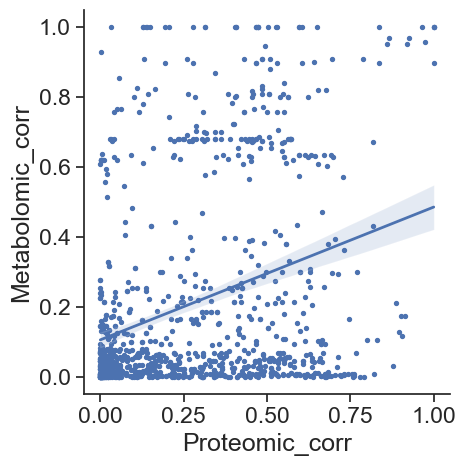

In [30]:
sns.set(font_scale = 1.5)
sns.set_style("ticks") # same as "white" but with ticks

#fig, ax = plt.subplots()  #i do this because ax.legend is needed to remove the legend title

#Change because I want metabolomics to be orange, proteomics to be blue
palette = ['tab:orange', 'tab:blue', 'tab:green','tab:red']


sns.lmplot(
    data=omics_corr_df,
    x="Proteomic_corr", 
    y="Metabolomic_corr",
    scatter_kws={'s':8,'alpha':1},
    line_kws={'linewidth':2})  #,color='red,x_jitter=0.005,y_jitter=0.005

res = scipy.stats.linregress(x=proteomic_corr, y=metabolomic_corr)  #R-squared: 0.099143
print(f"R-squared: {res.rvalue**2:.6f}")

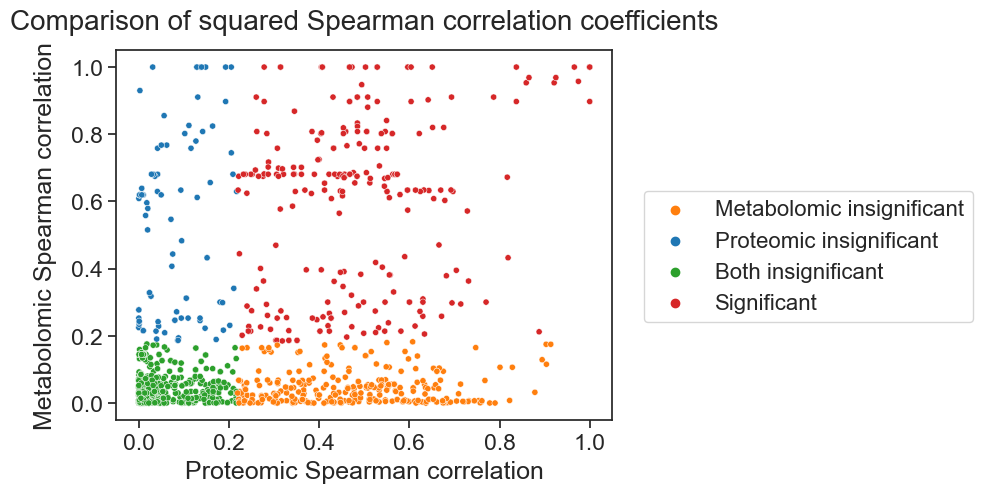

In [47]:
sns.set(font_scale = 1.5)
sns.set_style("ticks") # same as "white" but with ticks

fig, ax = plt.subplots()  #i do this because ax.legend is needed to remove the legend title

#Change because I want metabolomics to be orange, proteomics to be blue
palette = ['tab:orange', 'tab:blue', 'tab:green','tab:red']

sns.scatterplot(
    data=omics_corr_df,
    x="Proteomic_corr", 
    y="Metabolomic_corr",
    hue="Sig",
    hue_order = ['Metabolomic insignificant','Proteomic insignificant','Both insignificant','Significant'],
    palette=palette,
    #alpha=0.5,
    s=20
    )       #color='#FFD580',s=10
        
plt.title('Comparison of squared Spearman correlation coefficients',fontsize=20, pad=15)
plt.xlabel("Proteomic Spearman correlation",fontsize=18, labelpad=5)
plt.ylabel("Metabolomic Spearman correlation",fontsize=18, labelpad=10) 

legend = ax.legend(bbox_to_anchor=(1.75,0.65), prop={'size': 16})

#plt.savefig( '../Figures/common_pathways_correlation.png' , dpi=300,bbox_inches = 'tight' , pad_inches = 0.2 , facecolor='w')

### Bar graph showing clinical data methods

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('../Data/Su_COVID_metabolomics_processed_commoncases.csv', index_col=0)
samples = list(df.index)
sample_list = [(i+'-1') for i in samples]

In [5]:
df_mild = (df[df["WHO_status"] == '1-2']).iloc[:,:-2] #45 samples, remove the metadata
mild_samples = list(df_mild.index)
mild_sample_list = [(i+'-1') for i in mild_samples]

df_severe = (df[(df["WHO_status"] == '3-4') | (df["WHO_status"] == '5-7')]).iloc[:,:-2] #83 samples
severe_samples = list(df_severe.index)
severe_sample_list = [(i+'-1') for i in severe_samples]

In [6]:
clinical_df = pd.read_csv('../Data/Goldman_clinical_data.csv', index_col=0)

In [7]:
clinical_df[:5]

,Sample ID,Blood draw time point,Patient Location,Who Ordinal Scale,Sex,Age,Ethnicity,Race,BMI,Asthma,...,Respiratory Support,Temperature,Systolic BP,Diastolic BP,10X?,Metabolomics,Proteomics?,Isoplexis CD8 assay?,Isoplexis CD4 assay?,Isoplexis Monocyte assay?
Study Subject ID,,,,,,,,,,,,,,,,,,,,,
INCOV001,INCOV001-1,T1,Hospital,3,Female,77,NOT Hispanic or Latino,White,33.657783,No,...,None,36.6,139.0,60.0,yes,yes,yes,yes,yes,yes
INCOV001,INCOV001-2,T2,Hospital,3,Female,77,NOT Hispanic or Latino,White,33.657783,No,...,None,36.3,140.0,76.0,yes,yes,yes,yes,yes,yes
INCOV002,INCOV002-1,T1,ICU,5,Male,39,NOT Hispanic or Latino,White,27.900747,No,...,High flow nasal cannula (HFNC),37.3,96.0,57.0,yes,yes,yes,yes,yes,yes
INCOV002,INCOV002-2,T2,ICU,7,Male,39,NOT Hispanic or Latino,White,29.161972,No,...,Other,36.8,125.0,74.0,yes,yes,yes,yes,yes,yes
INCOV003,INCOV003-1,T1,ICU,7,Male,64,NOT Hispanic or Latino,White,24.546988,No,...,Other,37.2,89.0,50.0,yes,yes,yes,yes,yes,yes


In [8]:
print(len(mild_sample_list))
print(len(severe_sample_list))

45
83


In [9]:
mild_factors = clinical_df[clinical_df['Sample ID'].isin(mild_sample_list)]
severe_factors = clinical_df[clinical_df['Sample ID'].isin(severe_sample_list)]

In [13]:
def clinical_factor_stat(variable):
    print(mild_factors[variable].value_counts()) 
    print(severe_factors[variable].value_counts()) 

    print(mild_factors[variable].isna().sum())
    print(severe_factors[variable].isna().sum())

In [46]:
print(clinical_factor_stat('Chronic Hypertension'))

No     37
Yes     8
Name: Chronic Hypertension, dtype: int64
Yes    45
No     37
Name: Chronic Hypertension, dtype: int64
0
1
None


In [33]:
mild_age = list(mild_factors['Age'])
severe_age = list(severe_factors['Age'])

mild_BMI = list(mild_factors['BMI'])  #nearly all NaN
severe_BMI = list(severe_factors['BMI'])

In [40]:
import statistics 
print(statistics.mean(mild_age))
print(statistics.mean(severe_age))

print(statistics.stdev(mild_age))
print(statistics.stdev(severe_age))

45.355555555555554
nan


In [45]:
print(np.nanmean(mild_BMI))
print(np.nanmean(severe_BMI))

print(np.nanstd(mild_BMI))
print(np.nanstd(severe_BMI))

33.49109339
29.45133692487805
5.770888639999999
7.758952803931954


In [34]:
print(sum(i <= 50 for i in mild_age))
print(sum(i > 50 for i in mild_age))

print(sum(i <= 50 for i in severe_age))
print(sum(i > 50 for i in severe_age))

26
19
21
62


### Small diagrams to put in the introduction or methods

In [ ]:
import pandas as pd
import seaborn as sns
import sspa
import scipy
import numpy as np
import networkx as nx
import random
import matplotlib.pyplot as plt

In [ ]:
#Load the common cases dataset
df = pd.read_csv('../Data/Su_COVID_metabolomics_processed_commoncases.csv', index_col=0)
df


In [ ]:
df_sample = df.iloc[35:45,45:58] #13 metabolites long

g = sns.clustermap(df_sample,row_cluster=False,col_cluster=False,xticklabels=False, yticklabels=False,cmap='RdBu_r',figsize=(9,7),cbar=False)
g.ax_heatmap.tick_params(right=False)
g.cax.set_visible(False)
ax = g.ax_heatmap
ax.set_ylabel("")

In [ ]:
#df_sample = df.iloc[20:30,30:45] #15 proteins long
df_sample = df.iloc[35:45,80:97]

g = sns.clustermap(df_sample,row_cluster=False,col_cluster=False,xticklabels=False, yticklabels=False,cmap='RdBu_r',figsize=(9,5.4),cbar=False)
g.ax_heatmap.tick_params(right=False)
g.cax.set_visible(False)
ax = g.ax_heatmap
ax.set_ylabel("")

In [ ]:
reactome_pathways = sspa.process_gmt("Data/Reactome_Homo_sapiens_pathways_compounds_R84.gmt")
kpca_scores = sspa.sspa_kpca(df.iloc[:,:-2], reactome_pathways)
#Convert pathway ID to name
root_path = pd.read_excel('Data/Root_pathways.xlsx', header=None)
root_pathway_dict = {root_path[0][i]:root_path[1][i] for i in range(0,len(root_path))}

root_pathway_names = list(root_pathway_dict.keys())
#Using Sara's code, remove root pathways
kpca_scores = kpca_scores.drop(columns = list(set(root_pathway_names) & set(kpca_scores.columns)))

In [ ]:
kpca_scores

In [ ]:
kpca_scores_sample = kpca_scores.iloc[35:45,50:62] #12 metabolite pathways long

g = sns.clustermap(kpca_scores_sample,row_cluster=False,col_cluster=False,xticklabels=False, yticklabels=False,cmap='viridis',figsize=(9,7.5),cbar=False)
g.ax_heatmap.tick_params(right=False)
g.cax.set_visible(False)
ax = g.ax_heatmap
ax.set_ylabel("")

In [ ]:
kpca_scores_sample = kpca_scores.iloc[35:45,65:85] #20 protein pathways long

g = sns.clustermap(kpca_scores_sample,row_cluster=False,col_cluster=False,xticklabels=False, yticklabels=False,cmap='viridis',figsize=(9,4.5),cbar=False)
g.ax_heatmap.tick_params(right=False)
g.cax.set_visible(False)
ax = g.ax_heatmap
ax.set_ylabel("")

In [ ]:
kpca_scores_sample = kpca_scores.iloc[35:45,85:107] #23 protein pathways long

g = sns.clustermap(kpca_scores_sample,row_cluster=False,col_cluster=False,xticklabels=False, yticklabels=False,cmap='viridis',figsize=(9,4),cbar=False)
g.ax_heatmap.tick_params(right=False)
g.cax.set_visible(False)
ax = g.ax_heatmap
ax.set_ylabel("")

In [ ]:
spearman_results = scipy.stats.spearmanr(kpca_scores)

spearman_coef = spearman_results[0] #correlation coefficients
spearman_pvals = spearman_results[1] #p-values

spearman_coef = pd.DataFrame(spearman_coef)

In [ ]:
spearman_coef_sample = pd.DataFrame(spearman_coef).iloc[35:47,35:47] #12 pathways for metabolomic

corr= spearman_coef_sample.corr()
matrix = np.triu(corr)

g = sns.clustermap(spearman_coef_sample,row_cluster=True,col_cluster=True,xticklabels=False, yticklabels=False,cmap="coolwarm",figsize=(9,9),cbar=False)#,mask=matrix)
g.ax_heatmap.tick_params(right=False)
g.cax.set_visible(False)
ax = g.ax_heatmap
ax.set_ylabel("")

In [ ]:
spearman_coef_sample = pd.DataFrame(spearman_coef).iloc[50:70,50:70] #20 pathways for proteomic

corr= spearman_coef_sample.corr()
matrix = np.triu(corr)

g = sns.clustermap(spearman_coef_sample,row_cluster=True,col_cluster=True,xticklabels=False, yticklabels=False,cmap="coolwarm",figsize=(9,9),cbar=False)#,mask=matrix)
g.ax_heatmap.tick_params(right=False)
g.cax.set_visible(False)
ax = g.ax_heatmap
ax.set_ylabel("")

In [ ]:
spearman_coef_sample = pd.DataFrame(spearman_coef).iloc[100:123,100:123] #23 pathways for integrated

corr= spearman_coef_sample.corr()
matrix = np.triu(corr)

g = sns.clustermap(spearman_coef_sample,row_cluster=True,col_cluster=True,xticklabels=False, yticklabels=False,cmap="coolwarm",figsize=(9,9),cbar=False)#,mask=matrix)
g.ax_heatmap.tick_params(right=False)
g.cax.set_visible(False)
ax = g.ax_heatmap
ax.set_ylabel("")

In [ ]:
#https://stackoverflow.com/questions/61958360/how-to-create-random-graph-where-each-node-has-at-least-1-edge-using-networkx
#Generate random graph

nodes = 16
seed = random.randint(1,10)
probability = 0.6
G = nx.gnp_random_graph(nodes,probability)

plt.figure(figsize=(8,6))
nx.draw(G,node_color='#e69f00',node_size=500) 

#plt.savefig( '../Figures/random_fig1.png' , dpi=300,bbox_inches = 'tight' , pad_inches = 0.2 , facecolor='w')

In [ ]:
#https://stackoverflow.com/questions/61958360/how-to-create-random-graph-where-each-node-has-at-least-1-edge-using-networkx
#Generate random graph, then remove most edges but keep same layout

nodes = 16
seed = random.randint(1,10)
probability = 0.4
G = nx.gnp_random_graph(nodes,probability)

#https://cambiocteach.com/accessibility/colourchoice/   for colour palette
#orange #e69f00     sky blue #56b4e9    blue-green #009e73    (yellow #FFD580)

In [ ]:
pos = nx.random_layout(G, dim=2, center=None)

In [ ]:
plt.figure(figsize=(8,6))
nx.draw(G,pos,node_color='#56b4e9',node_size=500) 
plt.savefig( '../Figures/random_fig4.png' , dpi=300,bbox_inches = 'tight' , pad_inches = 0.2 , facecolor='w')

In [ ]:
G.edges()  
# (3,11->4,14) (6,11->7,13) (8,15->9,14) (11,14->) mild (edges kept)
# (0,2->(0,10) (1,15->2,11) (3,11->4,8) (6,15->7,15) (9,14->) severe

#severe not mild= [ (0, 2), (0, 3), (0, 7), (0, 10),(1, 15), (2, 6), (2, 7), (2, 8), (2, 11),(7, 15), (9, 15), (10, 11), (10, 12), (10, 14), (11, 12), (11, 13)]
#mild not severe = [(6, 11), (6, 12),(8, 15), (9, 10), (9, 11)]

In [ ]:
severe_not_mild= [ (0, 2), (0, 3), (0, 7), (0, 10),(1, 15), (2, 6), (2, 7), (2, 8), (2, 11),(7, 15), (9, 15), (10, 11), (10, 12), (10, 14), (11, 12), (11, 13)]
mild_not_severe = [(6, 11), (6, 12),(8, 15), (9, 10), (9, 11)]
diff_col = [(0, 2), (0, 3), (0, 7), (0, 10),(1, 8), (1, 12), (1, 13), (1, 15), (2, 6), (2, 7), (2, 8),(3, 12), (3, 15), (4, 5), (4, 8),(5, 15), (6, 7), (6, 9), (6, 10), (6, 11),(8, 13), (8, 15), (9, 10), (9, 11), (9, 14),(11, 12), (11, 13)]

# edges_col = []
# for i in range(len(severe_not_mild)+len(mild_not_severe)):
#     if i == 9 or i == 10 or i == 12 or i ==13 or 1== 14:
#          edges_col.append("blue")
#     else:
#         edges_col.append("red")

edges_col = []
for i in range(len(diff_col)):
     if (i > 9 and i <14) or (i > 16 and i <18) or i==22 :
          edges_col.append("blue")
     else:
         edges_col.append("red")

len(diff_col)

In [ ]:
H = G.copy()
#differential network
to_remove=[(0, 12), (0, 14), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7),(2, 11), (3, 4), (3, 9), (3, 11),(4, 13), (4, 14), (4, 15), (5, 6), (5, 9),(6, 12), (6, 15), (7, 8), (7, 12), (7, 13), (7, 15),(9, 15), (10, 11), (10, 12), (10, 14),(11, 14), (12, 13), (13, 14), (13, 15)]

#mild network
#to_remove = [(0, 2), (0, 3), (0, 7), (0, 10), (0, 12), (0, 14),(1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 12), (1, 13), (1, 15), (2, 6),  (2, 7), (2, 8),(2, 11), (3, 4), (3, 9), (3, 11),(4, 13), (4, 14),(4, 15), (5, 6), (5, 9), (5, 15), (6, 7), (6, 9), (6, 10),(7, 15), (8, 13),(9, 15), (10, 11), (10, 12), (10, 14), (11, 12), (11, 13),(13, 14), (13, 15) ]

#severe network
#to_remove = [(0, 12), (0, 14), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 12), (1, 13),(3, 4), (3, 9),  (4, 13), (4, 14), (4, 15), (5, 6), (5, 9), (5, 15), (6, 7), (6, 9), (6, 10), (6, 11), (6, 12),(8, 13), (8, 15), (9, 10), (9, 11), (13, 14), (13, 15) ]

#naive network
#to_remove = [(0, 12), (0, 14), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 12), (1, 13),(3, 4), (3, 9), (3, 11), (3, 12), (3, 15), (4, 5), (4,8), (4, 13), (4, 14),(4, 15), (5, 6), (5, 9), (5, 15), (6, 7), (6, 9), (6, 10),  (6, 15), (7, 8), (7, 12), (7, 13), (8, 13),  (9,14),(11, 14), (12, 13), (13, 14), (13, 15)]

H.remove_edges_from(to_remove)
H.remove_nodes_from(list(nx.isolates(H)))
nx.draw(H, pos, node_color='#56b4e9',edge_color = edges_col,node_size=350,width=2) #,with_labels=True)   edge_color=edges_col
#plt.savefig( '../Figures/random_fig5_diff.png' , dpi=300,bbox_inches = 'tight' , pad_inches = 0.2 , facecolor='w')

### Venn diagram to show the number of common pathways between metabolomic, proteomic and integrated

In [ ]:
#https://www.geeksforgeeks.org/how-to-create-and-customize-venn-diagrams-in-python/

#import module
from matplotlib_venn import venn3, venn3_circles
from matplotlib import pyplot as plt
  
# depict venn diagram
venn3(subsets=(20, 10, 12, 10, 9, 4, 3), 
      set_labels=('Group A', 'Group B', 'Group C'), 
      set_colors=("orange", "blue", "red"), alpha=0.7)
  
# outline of circle line style and width
venn3_circles(subsets=(20, 10, 12, 10, 9, 4, 3),
              linestyle="dashed", linewidth=2)
  
# title of the venn diagram
plt.title("Venn Diagram in geeks for geeks")
plt.show()

In [ ]:
#From matplotlib_venn documentation
from matplotlib import pyplot as plt
import numpy as np
from matplotlib_venn import venn3, venn3_circles
plt.figure(figsize=(4,4))
v = venn3(subsets=(1, 1, 1, 1, 1, 1, 1), set_labels = ('A', 'B', 'C'))
v.get_patch_by_id('100').set_alpha(1.0)
v.get_patch_by_id('100').set_color('white')
v.get_label_by_id('100').set_text('Unknown')
v.get_label_by_id('A').set_text('Set "A"')
c = venn3_circles(subsets=(1, 1, 1, 1, 1, 1, 1), linestyle='dashed')
c[0].set_lw(1.0)
c[0].set_ls('dotted')
plt.title("Sample Venn diagram")
plt.annotate('Unknown set', xy=v.get_label_by_id('100').get_position() - np.array([0, 0.05]), xytext=(-70,-70),
                ha='center', textcoords='offset points', bbox=dict(boxstyle='round,pad=0.5', fc='gray', alpha=0.1),
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5',color='gray'))
plt.show()

In [ ]:
#For WEIGHTED Venn diagram

from matplotlib_venn import venn3, venn3_circles
from matplotlib import pyplot as plt
import numpy as np

plt.figure(figsize=(6, 6))
#Colours are washed out because they're overlapping, so colour by patch instead
#Difficulty knowing which circle is which omic
  
#Draw Venn diagram
vd = venn3(subsets=(0, 0, 0, 35, 97, 531, 47), 
      set_labels=('', '', ''), 
      set_colors=('Red', 'Yellow', 'Blue'),alpha=0.8)   #, alpha=0.1
  
#Circle outline
c = venn3_circles(subsets=(0, 0, 0, 35, 97, 531, 47), linewidth=1)
c[0].set_ls('dashed')
c[1].set_ls('dashed')

#Change patch colour
vd.get_patch_by_id("001").set_color('#febb81')   #big circle
vd.get_patch_by_id("101").set_color('#f8765c')  
vd.get_patch_by_id("011").set_color('#d3436e')   
vd.get_patch_by_id("111").set_color('#982d80')   #most overlap
 
#Move circle number labels 
vd.get_label_by_id("101").set_x(-0.5)   #111,(110),(100),(000),101
vd.get_label_by_id("001").set_x(-0.004)   #111,(110),(100),(000),101,001
vd.get_label_by_id("001").set_y(-0.53)   #111,(110),(100),(000),101,001,(010),011


#Changing font size
for text in vd.set_labels:  #Omic labels
    text.set_fontsize(15)  

for x in range(len(vd.subset_labels)):  #Circle numbers
    if vd.subset_labels[x] is not None:
        vd.subset_labels[x].set_fontsize(14)

#plt.annotate('144 edges',xy=[-0.7,.2])  #doesn't show up past the circle
#plt.annotate('578 edges',xy=[0.4,0.45])
#plt.annotate('710 edges',xy=[-0.4,-0.45])

plt.title("Pathway overlap between omics",fontsize=18)    #'#5f187f', '#982d80', '#d3436e', '#f8765c', '#febb81']

In [ ]:
vd.get_label_by_id('001').get_position()

In [ ]:
#For UNWEIGHTED Venn diagram

import matplotlib.pyplot as plt
import matplotlib_venn as mv

#Draw venn diagram
vd = mv.venn3_unweighted(subsets=(0, 0, 0, 35, 97, 531, 47), 
      #set_labels=('Metabolomic', 'Proteomic', 'Integrated'), 
      set_labels=('', '', ''), 
      set_colors=( '#e34933', '#fee99d', '#51B0DF'), alpha=0.7)   #        '#e34933', '#fee99d', '#588cc0'/'#51B0DF'

#Change font size
for text in vd.set_labels:  #Omic labels
    text.set_fontsize(16)  

for x in range(len(vd.subset_labels)):  #Circle numbers
    if vd.subset_labels[x] is not None:
        vd.subset_labels[x].set_fontsize(21)

#Change patch colour  
vd.get_patch_by_id("011").set_color('#C7DFD9') 

#Move label a bit
vd.get_label_by_id("011").set_x(0.31)
vd.get_label_by_id("101").set_x(-0.3) #111

#plt.title("Pathway overlap between omics",fontsize=18)  

#plt.savefig( '../Figures/random_fig6.png' , dpi=300,bbox_inches = 'tight' , pad_inches = 0.2 , facecolor='w')

In [ ]:
import seaborn as sns
#Obtain hex codes for sns colour palette
#https://www.practicalpythonfordatascience.com/ap_seaborn_palette
print(sns.color_palette("magma").as_hex()[:])  #'Spectral','RdYlBu'
sns.color_palette("magma")

### Venn diagram to show the number of differential edges between metabolomic, proteomic and integrated

In [ ]:
#For UNWEIGHTED Venn diagram

import matplotlib.pyplot as plt
import matplotlib_venn as mv

#Draw venn diagram
vd = mv.venn3_unweighted(subsets=(15,599,0,1437,2,993,0), 
      #set_labels=('Metabolomic', 'Proteomic', 'Integrated'), 
      set_labels=('', '', ''), 
      set_colors=( '#e34933', '#fee99d', '#51B0DF'), alpha=0.7)   #        '#e34933', '#fee99d', '#588cc0'

for text in vd.set_labels:  #Omic labels
    text.set_fontsize(16)  

for x in range(len(vd.subset_labels)):  #Circle numbers
    if vd.subset_labels[x] is not None:
        vd.subset_labels[x].set_fontsize(21)


#Change patch colour
vd.get_patch_by_id("011").set_color('#C7DFD9')  

#Move label a bit
vd.get_label_by_id("010").set_x(0.4) 
vd.get_label_by_id("011").set_x(0.296) 
vd.get_label_by_id("101").set_x(-0.3) #111


#plt.title("Pathway overlap between omics",fontsize=18)  

#plt.savefig( '../Figures/random_fig7.png' , dpi=300,bbox_inches = 'tight' , pad_inches = 0.2 , facecolor='w')